# Book Recommendation System Model

### Created by Rendra Dwi Prasetyo

In [ ]:
pip install seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mengupload file kunci API dari kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rendraprasetyo","key":"4bad7239e9e86f57b87632f6967fd0f9"}'}

In [ ]:
# Membuat directory file dan memindahkan file "kaggle.json"
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# donwload dataset
!kaggle datasets download -d arashnic/book-recommendation-dataset

Dataset URL: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset
License(s): CC0-1.0
 21% 5.00M/24.3M [00:00<00:00, 41.1MB/s]
100% 24.3M/24.3M [00:00<00:00, 125MB/s] 


In [ ]:
# mengechek apakah dataset tadi udah ada di Disk google colab
!ls

book-recommendation-dataset.zip  kaggle.json  sample_data


In [ ]:
# mengekstrak/unzip dataset yang sdah saya download tadi
!unzip book-recommendation-dataset.zip -d data_dir

Archive:  book-recommendation-dataset.zip
  inflating: data_dir/Books.csv      
  inflating: data_dir/DeepRec.png    
  inflating: data_dir/Ratings.csv    
  inflating: data_dir/Users.csv      
  inflating: data_dir/classicRec.png  
  inflating: data_dir/recsys_taxonomy2.png  


In [ ]:
books_path = 'data_dir/Books.csv'
ratings_path = 'data_dir/Ratings.csv'
users_path = 'data_dir/Users.csv'

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Books Dataset

In [ ]:
books_df = pd.read_csv(books_path, sep=',', on_bad_lines='skip', encoding='latin-1')
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
books_df.shape

(271360, 8)

In [ ]:
books_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [ ]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Semua fitur/kolom memiliki tipe data 'object'.

In [ ]:
books_df[books_df['ISBN'].str.contains(r'\D', regex=True)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...
11,080652121X,Hitler's Secret Bankers: The Myth of Swiss Neu...,Adam Lebor,2000,Citadel Press,http://images.amazon.com/images/P/080652121X.0...,http://images.amazon.com/images/P/080652121X.0...,http://images.amazon.com/images/P/080652121X.0...
40,038078243X,Miss Zukas and the Raven's Dance,Jo Dereske,1996,Avon,http://images.amazon.com/images/P/038078243X.0...,http://images.amazon.com/images/P/038078243X.0...,http://images.amazon.com/images/P/038078243X.0...
41,055321215X,Pride and Prejudice,Jane Austen,1983,Bantam,http://images.amazon.com/images/P/055321215X.0...,http://images.amazon.com/images/P/055321215X.0...,http://images.amazon.com/images/P/055321215X.0...
42,067176537X,The Therapeutic Touch: How to Use Your Hands t...,Dolores Krieger,1979,Fireside,http://images.amazon.com/images/P/067176537X.0...,http://images.amazon.com/images/P/067176537X.0...,http://images.amazon.com/images/P/067176537X.0...
...,...,...,...,...,...,...,...,...
271323,000637610X,You Got an Ology,Maureen Lipman,1990,HarperCollins Publishers,http://images.amazon.com/images/P/000637610X.0...,http://images.amazon.com/images/P/000637610X.0...,http://images.amazon.com/images/P/000637610X.0...
271335,381440176X,"Ein Fall fÃ?ÃÂ¼r TKKG, Bd.50, Sklaven fÃ?Ã...",Stefan Wolf,1989,Pelikan,http://images.amazon.com/images/P/381440176X.0...,http://images.amazon.com/images/P/381440176X.0...,http://images.amazon.com/images/P/381440176X.0...
271343,020130998X,The Unified Modeling Language Reference Manual...,James Rumbaugh,1998,Addison-Wesley Professional,http://images.amazon.com/images/P/020130998X.0...,http://images.amazon.com/images/P/020130998X.0...,http://images.amazon.com/images/P/020130998X.0...
271353,014002803X,Anti Death League,Kingsley Amis,1975,Viking Press,http://images.amazon.com/images/P/014002803X.0...,http://images.amazon.com/images/P/014002803X.0...,http://images.amazon.com/images/P/014002803X.0...


Ternyata nilai ISBN-nya ada yang mengandung huruf, sehingga tipe datanya tetap obyek.

In [ ]:
books_df.isna().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,3


Terdapat nilai null dalam fitur :
1. Book-Author sebanyak 2 data
2. Publisher sebanyak 2 data
3. Image-URL-L sebanyak 3 data

total 5 data berniali null (karena jumlahnya minor / sangat kecil jika dibandingkan total data yang saya miliki yaitu 22334 data, maka saya lakukan penghapusan sejumlah 7 data tersebut)

In [ ]:
books_df_clean = books_df.dropna()

In [ ]:
books_df_clean.isna().sum()

,0
ISBN,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-S,0
Image-URL-M,0
Image-URL-L,0


In [ ]:
print(books_df_clean['Year-Of-Publication'].unique())

[2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927 1931
 1914 2050 1934 1910 1933 1902 1924 1921 1900 2038 2026 1944 1917 1901
 2010 1908 1906 1935 1806 2021 '2000' '1995' '1999' '2004' '2003' '1990'
 '1994' '1986' '1989' '2002' '1981' '1993' '1983' '1982' '1976' '1991'
 '1977' '1998' '1992' '1996' '0' '1997' '2001' '1974' '1968' '1987' '1984'
 '1988' '1963' '1956' '1970' '1985' '1978' '1973' '1980' '1979' '1975'
 '1969' '1961' '1965' '1939' '1958' '1950' '1953' '1966' '1971' '1959'
 '1972' '1955' '1957' '1945' '1960' '1967' '1932' '1924' '1964' '2012'
 '1911' '1927' '1948' '1962' '2006' '1952' '1940' '1951' '1931' '1954

Data numerik dan string ditemukan, jadi semuanya akan diubah menjadi string. Kemudian, data yang bersifat non-numerik dan bernilai 0 akan dihapus.

### Merubah fitur/kolum 'Year-Of-Publication' menjadi string.

In [ ]:
books_df_clean['Year-Of-Publication'] = books_df_clean['Year-Of-Publication'].astype(str)

In [ ]:
print(books_df_clean['Year-Of-Publication'].unique())

['2002' '2001' '1991' '1999' '2000' '1993' '1996' '1988' '2004' '1998'
 '1994' '2003' '1997' '1983' '1979' '1995' '1982' '1985' '1992' '1986'
 '1978' '1980' '1952' '1987' '1990' '1981' '1989' '1984' '0' '1968' '1961'
 '1958' '1974' '1976' '1971' '1977' '1975' '1965' '1941' '1970' '1962'
 '1973' '1972' '1960' '1966' '1920' '1956' '1959' '1953' '1951' '1942'
 '1963' '1964' '1969' '1954' '1950' '1967' '2005' '1957' '1940' '1937'
 '1955' '1946' '1936' '1930' '2011' '1925' '1948' '1943' '1947' '1945'
 '1923' '2020' '1939' '1926' '1938' '2030' '1911' '1904' '1949' '1932'
 '1928' '1929' '1927' '1931' '1914' '2050' '1934' '1910' '1933' '1902'
 '1924' '1921' '1900' '2038' '2026' '1944' '1917' '1901' '2010' '1908'
 '1906' '1935' '1806' '2021' '2012' '2006' '1909' '2008' '1378' '1919'
 '1922' '1897' '2024' '1376' '2037']


Sekarang dapat diamati bahwa semua nilai di kolom 'Tahun Publikasi' telah dikonversi menjadi string. Namun, ada entri dengan nilai teks dan angka 0, yang bukan merupakan tahun publikasi yang valid. Oleh karena itu, data dengan nilai tersebut akan dihapus.


### Menghapus nilai yang invalid dalam fitur '**Year-Of-Publication**'

In [ ]:
books_df_clean = books_df_clean[books_df_clean['Year-Of-Publication'].str.isdigit()]
books_df_clean = books_df_clean[books_df_clean['Year-Of-Publication'] != '0']

### Mengkonversi tipe data '**Year-Of-Publication**' menjadi integer (int).

In [ ]:
books_df_clean['Year-Of-Publication'] = books_df_clean['Year-Of-Publication'].astype(int)

In [ ]:
print(books_df_clean['Year-Of-Publication'].unique())
print(books_df_clean['Year-Of-Publication'].dtype)

[2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927 1931
 1914 2050 1934 1910 1933 1902 1924 1921 1900 2038 2026 1944 1917 1901
 2010 1908 1906 1935 1806 2021 2012 2006 1909 2008 1378 1919 1922 1897
 2024 1376 2037]
int64


Sekarang semua data di '**Year-Of-Publication**' sudah bersih dan benar, dan tipe datanya telah diubah menjadi integer.

In [ ]:
books_df_clean.shape

(266735, 8)

In [ ]:
books_df_clean.nunique()

,0
ISBN,266735
Book-Title,238508
Book-Author,100666
Year-Of-Publication,115
Publisher,16393
Image-URL-S,266426
Image-URL-M,266426
Image-URL-L,266426


Semua nilai ISBN bersifat unik, yang ditunjukkan dengan jumlah baris dalam data yang cocok dengan jumlah nilai ISBN unik.

In [ ]:
books_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266735 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 266735 non-null  object
 1   Book-Title           266735 non-null  object
 2   Book-Author          266735 non-null  object
 3   Year-Of-Publication  266735 non-null  int64 
 4   Publisher            266735 non-null  object
 5   Image-URL-S          266735 non-null  object
 6   Image-URL-M          266735 non-null  object
 7   Image-URL-L          266735 non-null  object
dtypes: int64(1), object(7)
memory usage: 18.3+ MB


Data sudah aman dari null value

In [ ]:
books_df_clean['Book-Title'].value_counts()

,count
Book-Title,
Selected Poems,27
Little Women,22
Wuthering Heights,20
Dracula,20
Adventures of Huckleberry Finn,20
...,...
Raising Depression-Free Children: A Parent's Guide to Prevention and Early Intervention,1
Lost in a Good Book,1
The Secret Garden (Penguin Twentieth-Century Classics),1


In [ ]:
selected_poems_df = books_df_clean[books_df_clean['Book-Title'] == 'Selected Poems']
print(selected_poems_df)

              ISBN      Book-Title                 Book-Author  \
4523    081120958X  Selected Poems     William Carlos Williams   
39416   0811201465  Selected Poems                  K. Patchen   
41316   0679750800  Selected Poems                   Rita Dove   
106885  0060931744  Selected Poems            Gwendolyn Brooks   
118775  0517101548  Selected Poems                  John Donne   
127462  0520012984  Selected Poems               Paul Verlaine   
156894  0871401541  Selected Poems              E. E. Cummings   
158312  0060909897  Selected Poems            Gwendolyn Brooks   
175602  0571050190  Selected Poems         T.           T Gunn   
183908  1550651498  Selected Poems             Ralph Gustafson   
184897  0333516265  Selected Poems                Thomas Hardy   
189247  0679430830  Selected Poems                   Rita Dove   
189963  0940262193  Selected Poems              Kathleen Raine   
196944  0802151027  Selected Poems                Pablo Neruda   
198960  18

Untuk buku yang berjudul "Selected Poems," ternyata pengarangnya berbeda-beda.

In [ ]:
little_women_df = books_df_clean[books_df_clean['Book-Title'] == 'Little Women']
print(little_women_df)

              ISBN    Book-Title        Book-Author  Year-Of-Publication  \
3952    185854176X  Little Women   Louisa M. Atcott                 1995   
12227   0590203509  Little Women  Louisa May Alcott                 1994   
20676   0440447682  Little Women  Louisa May Alcott                 1990   
52210   0451529308  Little Women  Louisa May Alcott                 2004   
52551   0451518144  Little Women  Louisa May Alcott                 1983   
53358   0590437976  Little Women  Louisa May Alcott                 1992   
57432   0195813898  Little Women             Alcott                 1985   
72168   0785788727  Little Women  Louisa May Alcott                 1999   
82565   0448110199  Little Women  Louisa May Alcott                 1981   
84807   0812523334  Little Women  Louisa May Alcott                 1994   
110746  0394562798  Little Women  Louisa May Alcott                 1988   
118219  1557042160  Little Women      Laurie Lawlor                 1994   
124841  0590

Untuk buku yang berjudul "Little Women," walaupun ISBN-nya berbeda, penulisnya tetap sama: Louisa May Alcott. Hal ini menunjukkan bahwa perbedaan tahun atau waktu penerbitan menghasilkan ISBN yang berbeda pula untuk setiap edisi bukunya.

In [ ]:
print(books_df_clean['Image-URL-S'][0])
print(books_df_clean['Image-URL-M'][0])
print(books_df_clean['Image-URL-L'][0])

http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg
http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg
http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg


### Image with different sizes.
Image-URL-S
![Alt Text](http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg)

Image-URL-M
![Alt Text](http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg)

Image-URL-L
![Alt Text](http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg)

Karena ukuran yang lebih besar cenderung lebih jelas, URL gambar yang besar (L) akan digunakan, dan ukuran kecil (S) dan sedang (M) akan dihilangkan.

In [ ]:
books_df_clean.drop(columns=['Image-URL-S', 'Image-URL-M'], inplace=True)

In [ ]:
books_df_clean.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-L'],
      dtype='object')

# Ratings Dataset

In [ ]:
ratings_df = pd.read_csv(ratings_path, sep=',', encoding='latin-1')
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings_df.shape

(1149780, 3)

Pada dataset rating terdapat 3 kolom dan 1.149.780 record.

In [ ]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
ratings_df.isna().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


dalam ratings dataset tidak ada nilai yang hilang / null value

In [ ]:
ratings_df.nunique()

,0
User-ID,105283
ISBN,340556
Book-Rating,11


In [ ]:
ratings_df['Book-Rating'].value_counts()

,count
Book-Rating,
0,716109
8,103736
10,78610
7,76457
9,67541
5,50974
6,36924
4,8904
3,5996


Dalam deskripsi dataset disebutkan bahwa rentang rating buku berada pada skala 1-10. Nilai 0 mewakili peringkat implisit, yang menunjukkan bahwa pengguna mungkin tidak memberi peringkat buku secara eksplisit.

In [ ]:
ratings_df['User-ID'].value_counts()

,count
User-ID,
11676,13602
198711,7550
153662,6109
98391,5891
35859,5850
...,...
116180,1
116166,1
116154,1


Pengguna dengan rating terbanyak adalah pengguna dengan ID 11676 yang telah memberikan rating 13.602.

# Merging books_df dan ratings_df

In [ ]:
books_and_ratings = ratings_df.merge(books_df, on="ISBN")
books_and_ratings.head(3)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...


In [ ]:
books_and_ratings.shape

(1017123, 10)

In [ ]:
books_and_ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L'],
      dtype='object')

# Users Dataset

In [ ]:
users_df = pd.read_csv(users_path, sep=',', encoding='latin-1')
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
users_df.shape

(278858, 3)

dataset terdiri dari 3 kolum and 278,858 data.

In [ ]:
users_df.nunique()

,0
User-ID,278858
Location,57339
Age,165


semua "User-IDs" merupakan nilai unik.

In [ ]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
users_df.isna().sum()

,0
User-ID,0
Location,0
Age,110762


Dalam kolum "Age" terdapat 110,762 nilai hilang/null.

In [ ]:
users_df['Location'].value_counts()

,count
Location,
"london, england, united kingdom",2506
"toronto, ontario, canada",2250
"sydney, new south wales, australia",1744
"melbourne, victoria, australia",1708
"portland, oregon, usa",1629
...,...
"gneisenaustr. 3, nordrhein-westfalen, germany",1
"-, bayern, germany",1
"bouchegouf, guelma, algeria",1


### Age missing values

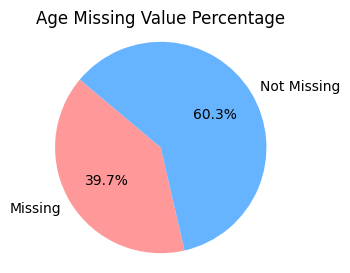

In [ ]:
missing_age_count = users_df['Age'].isna().sum()
total_age_count = len(users_df['Age'])
non_missing_age_count = total_age_count - missing_age_count

percent_missing = (missing_age_count / total_age_count) * 100
percent_not_missing = 100 - percent_missing

labels = ['Missing', 'Not Missing']
sizes = [percent_missing, percent_not_missing]
colors = ['#ff9999', '#66b3ff']

plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Age Missing Value Percentage')
plt.axis('equal')

plt.show()

Sebanyak 39,7% nilai Age hilang. Oleh karena itu, Usia tidak akan digunakan sebagai fitur yang mempengaruhi sistem rekomendasi buku ini. Namun untuk memberikan gambaran sebaran umurnya, saya telah membuat histogram di bawah ini.

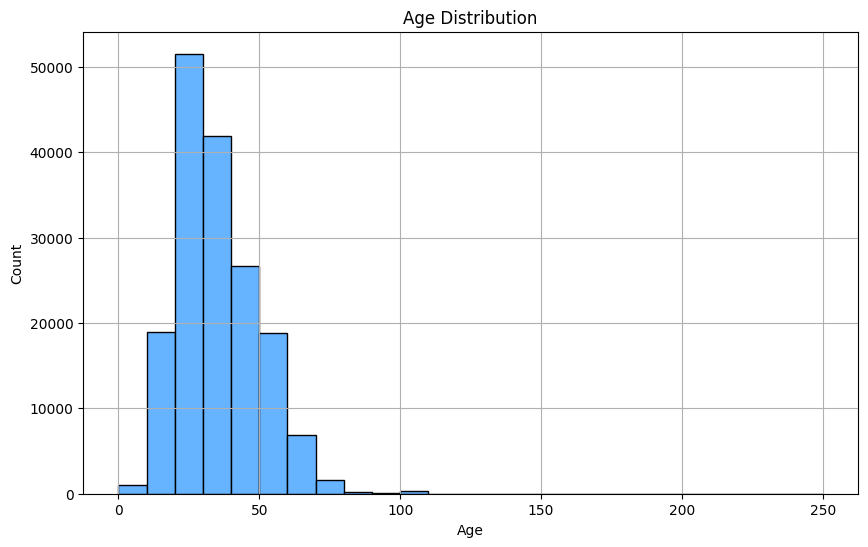

In [ ]:
age_data = users_df['Age'].dropna()

min_age = int(age_data.min())
max_age = int(age_data.max())

bins = list(range(min_age, max_age + 10, 10))

plt.figure(figsize=(10, 6))
plt.hist(age_data, bins=bins, edgecolor='black', color='#66b3ff')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)

plt.show()

Dapat diamati bahwa sebagian besar pengguna (yang datanya tidak hilang) berada dalam rentang usia 20 hingga 50 tahun.

## Filter

#### Filter 1: Mengelompokkan berdasarkan `Book-Title` dan hitung berapa banyak pengguna yang berinteraksi dengan setiap buku. Dalam `Action-Count`, kami menyertakan semua interaksi, termasuk interaksi dengan `Book-Rating` adalah 0.


In [ ]:
action_count = books_and_ratings.groupby('Book-Title')['Book-Rating'].count().reset_index()
action_count.head()

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [ ]:
action_count.rename(columns={'Book-Rating': 'Action-Count'}, inplace=True)
action_count.head()

,Book-Title,Action-Count
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


### Filter 2: Mengelompokkan berdasarkan `Book-Title` dan hitung berapa banyak pengguna yang telah memberikan peringkat eksplisit pada skala 1 hingga 10. Oleh karena itu, `Book-Rating` sebesar 0 tidak akan disertakan dalam `Rating-Count`.

In [ ]:
filtered_ratings = books_and_ratings[books_and_ratings['Book-Rating'] > 0]
rating_count = filtered_ratings.groupby('Book-Title')['Book-Rating'].count().reset_index()

rating_count.rename(columns={'Book-Rating': 'Rating-Count'}, inplace=True)
rating_count.head()

,Book-Title,Rating-Count
0,A Light in the Storm: The Civil War Diary of ...,1
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1
2,Dark Justice,1
3,Earth Prayers From around the World: 365 Pray...,7
4,Final Fantasy Anthology: Official Strategy Gu...,2


### Merging Action Counts dan Rating Counts kedalam Final DataFrame

In [ ]:
final_df = books_and_ratings.merge(action_count, on='Book-Title')
final_df = final_df.merge(rating_count, on='Book-Title')
final_df.head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Action-Count,Rating-Count
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,60,28
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,5,1


In [ ]:
final_df.shape

(860178, 12)

In [ ]:
duplicate_entries = final_df.groupby(['User-ID', 'Book-Title']).size().reset_index(name='count')
duplicates_more_than_once = duplicate_entries[duplicate_entries['count'] > 1]
print(duplicates_more_than_once)

        User-ID                                         Book-Title  count
314         254                                       Cat's Cradle      2
365         254   Harry Potter and the Chamber of Secrets (Book 2)      2
368         254  Harry Potter and the Prisoner of Azkaban (Book 3)      2
397         254                                 Martian Chronicles      2
410         254                                         Neverwhere      2
...         ...                                                ...    ...
854805   278418                                  The Street Lawyer      2
854835   278418                                        The Witness      2
854856   278418                                         Thumbelina      2
854924   278418                                           Vanished      2
854966   278418            Wee Sing Nursery Rhymes &amp; Lullabies      2

[4370 rows x 3 columns]


### Menghapus data yang duplikat

In [ ]:
final_df.drop_duplicates(['Book-Title', 'User-ID'], inplace=True)

In [ ]:
final_df.shape

(855611, 12)

### Filter 3: Filter buku yang telah direview minimal 50 kali (Rating-Count minimal 50) atau memiliki Action-Count minimal 100.

In [ ]:
final_df = final_df[(final_df['Rating-Count'] >= 50) | (final_df['Action-Count'] >= 100)]
final_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Action-Count,Rating-Count
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,650,293
6,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,838,366
7,276746,0425115801,0,Lightning,Dean R. Koontz,1996,Berkley Publishing Group,http://images.amazon.com/images/P/0425115801.0...,http://images.amazon.com/images/P/0425115801.0...,http://images.amazon.com/images/P/0425115801.0...,274,89
8,276746,0449006522,0,Manhattan Hunt Club,JOHN SAUL,2002,Ballantine Books,http://images.amazon.com/images/P/0449006522.0...,http://images.amazon.com/images/P/0449006522.0...,http://images.amazon.com/images/P/0449006522.0...,111,51
9,276746,0553561618,0,Dark Paradise,TAMI HOAG,1994,Bantam,http://images.amazon.com/images/P/0553561618.0...,http://images.amazon.com/images/P/0553561618.0...,http://images.amazon.com/images/P/0553561618.0...,142,43


# Konversi Pivot Table

In [ ]:
books_pivot = final_df.pivot_table(columns='User-ID', index='Book-Title', values='Book-Rating')
books_pivot

User-ID,8,9,14,16,17,26,32,39,42,44,...,278819,278820,278824,278828,278832,278836,278843,278844,278846,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24 Hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
books_pivot.shape

(920, 38062)

### Mengisi nilai yang hilang (Nan) dengan 0

In [ ]:
books_pivot.fillna(0, inplace=True)
books_pivot

User-ID,8,9,14,16,17,26,32,39,42,44,...,278819,278820,278824,278828,278832,278836,278843,278844,278846,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 1. Menggunakan Cosine Similarity

### Menghitung kemiripan antar buku

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(books_pivot)
book_similarity_df = pd.DataFrame(similarity, index=books_pivot.index, columns=books_pivot.index)

In [ ]:
def recommend_books(book_title, top_n=8):
    similar_scores = book_similarity_df[book_title]
    similar_books = similar_scores.sort_values(ascending=False).drop(book_title).head(top_n)

    return similar_books

In [ ]:
recommendations = recommend_books('Harry Potter and the Chamber of Secrets (Book 2)')
print(recommendations)

Book-Title
Harry Potter and the Prisoner of Azkaban (Book 3)                   0.532624
Harry Potter and the Goblet of Fire (Book 4)                        0.511679
Harry Potter and the Sorcerer's Stone (Book 1)                      0.383957
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))    0.303902
Harry Potter and the Order of the Phoenix (Book 5)                  0.296864
The Fellowship of the Ring (The Lord of the Rings, Part 1)          0.132119
The Reptile Room (A Series of Unfortunate Events, Book 2)           0.098910
The Two Towers (The Lord of the Rings, Part 2)                      0.098397
Name: Harry Potter and the Chamber of Secrets (Book 2), dtype: float64


## 2. KNN

In [ ]:
from scipy.sparse import csr_matrix

book_sparse = csr_matrix(books_pivot)
book_sparse

<920x38062 sparse matrix of type '<class 'numpy.float64'>'
	with 74947 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.neighbors import NearestNeighbors

knn_model1 = NearestNeighbors( algorithm='brute')
knn_model1.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [ ]:
def knn_recommend_books(book_title, model, n_recommendations=8, print_distance=False):
    book_idx = books_pivot.index.get_loc(book_title)

    # Find the distances and indices of the nearest neighbors
    distances, indices = model.kneighbors(book_sparse[book_idx], n_neighbors=n_recommendations+1)

    # Get the titles of the recommended books (excluding the input book itself)
    recommended_books = books_pivot.index[indices.flatten()[1:]]
    recommended_distances = distances.flatten()[1:]  # Exclude the first distance (the book itself)

    print(f"Recommendations for '{book_title}':")
    for i, (book, distance) in enumerate(zip(recommended_books, recommended_distances), 1):
        if print_distance:  # If print_distance is True
            print(f"{i}. {book} (Distance: {distance:.4f})")
        else:
            print(f"{i}. {book}")

In [ ]:
knn_recommend_books('Harry Potter and the Chamber of Secrets (Book 2)', knn_model1, print_distance=True)

Recommendations for 'Harry Potter and the Chamber of Secrets (Book 2)':
1. Harry Potter and the Goblet of Fire (Book 4) (Distance: 149.9767)
2. Harry Potter and the Prisoner of Azkaban (Book 3) (Distance: 150.0633)
3. Harry Potter and the Sorcerer's Stone (Book 1) (Distance: 158.4866)
4. The Sands of Time (Distance: 161.2886)
5. Whirlwind (Tyler, Book 1) (Distance: 161.5735)
6. The Laws of Our Fathers (Distance: 161.6385)
7. Zoya (Distance: 161.7251)
8. Kaleidoscope (Distance: 161.8827)


# KNN dengan Cosine Metric

In [ ]:
knn_model2 = NearestNeighbors( algorithm='brute', metric='cosine')
knn_model2.fit(book_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
knn_recommend_books('Harry Potter and the Chamber of Secrets (Book 2)', knn_model2, print_distance=True)

Recommendations for 'Harry Potter and the Chamber of Secrets (Book 2)':
1. Harry Potter and the Prisoner of Azkaban (Book 3) (Distance: 0.4674)
2. Harry Potter and the Goblet of Fire (Book 4) (Distance: 0.4883)
3. Harry Potter and the Sorcerer's Stone (Book 1) (Distance: 0.6160)
4. Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)) (Distance: 0.6961)
5. Harry Potter and the Order of the Phoenix (Book 5) (Distance: 0.7031)
6. The Fellowship of the Ring (The Lord of the Rings, Part 1) (Distance: 0.8679)
7. The Reptile Room (A Series of Unfortunate Events, Book 2) (Distance: 0.9011)
8. The Two Towers (The Lord of the Rings, Part 2) (Distance: 0.9016)


Dapat diamati bahwa Cosine Similarity dan KNN menghasilkan hasil rekomendasi yang serupa. Nilai jarak pada model KNN sama dengan 1 dikurangi skor kemiripan dari Cosine Similarity.

In [ ]:
knn_recommend_books('Harry Potter and the Chamber of Secrets (Book 2)', knn_model2)

Recommendations for 'Harry Potter and the Chamber of Secrets (Book 2)':
1. Harry Potter and the Prisoner of Azkaban (Book 3)
2. Harry Potter and the Goblet of Fire (Book 4)
3. Harry Potter and the Sorcerer's Stone (Book 1)
4. Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
5. Harry Potter and the Order of the Phoenix (Book 5)
6. The Fellowship of the Ring (The Lord of the Rings, Part 1)
7. The Reptile Room (A Series of Unfortunate Events, Book 2)
8. The Two Towers (The Lord of the Rings, Part 2)


Menload model ke dalam pkl file

In [ ]:
import pickle as pkl

pkl.dump(knn_model2, open('/knn_model.pkl', 'wb'))
pkl.dump(final_df, open('/final_data.pkl', 'wb'))
pkl.dump(books_pivot, open('/book_pivot.pkl', 'wb'))